DATA WRANGLING AND CLEANING:

First, we will import necessary libraries. 


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.model_selection as model_selection

Then, we will scrape the Kaggle webpage for the .csv file.


In [2]:
#Produces error. File must be pre-cleaned.
#url = 'https://www.kaggle.com/kandij/diabetes-dataset?select=diabetes2.csv'
#df = pd.read_csv(url)
#df.head()

There is an error in line 7, where a comma was missing. Instead of accessing the file online, the file is downloaded and patched. The fixed file, named diabetes2.csv, is uploaded to GitHub.

In [3]:
file = 'diabetes2.csv'
df = pd.read_csv(file)
df.reset_index()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Various other checks are performed, such as .info() and .describe()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All columns appear numeric at first glance. However, Outcome is our target, categorical variable represented as 0 for non-diabetic and 1 for diabetic.  

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

Looks like no null values are present. It doesn't make sense that some values for blood pressure, skin thickness, or BMI are zero.

In [7]:
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


For blood pressure, that's a lot of rows with 0 blood pressure. Rather than removing the rows, imputing the mean of blood pressure without zeros seems to be the way to go. To impute the zeros, zeros have to be switched with 'NaN' first.

In [8]:
df.loc[df.BloodPressure == 0, 'BloodPressure'] = np.nan
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Now that the zeroes from blood pressure are gone, it's time to impute the mean of blood pressure into NaNs.

In [9]:
BP_mean = df['BloodPressure'].mean()
#print(BP_mean)
df.fillna(BP_mean, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


Now to handle skin thickness:

In [10]:
df[df['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64.000000,0,0,23.3,0.672,32,1
5,5,116,74.000000,0,0,25.6,0.201,30,0
7,10,115,72.405184,0,0,35.3,0.134,29,0
9,8,125,96.000000,0,0,0.0,0.232,54,1
10,4,110,92.000000,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72.000000,0,0,36.3,0.258,52,1
758,1,106,76.000000,0,0,37.5,0.197,26,0
759,6,190,92.000000,0,0,35.5,0.278,66,1
762,9,89,62.000000,0,0,22.5,0.142,33,0


In [11]:
df.loc[df.SkinThickness == 0, 'SkinThickness'] = np.nan
df[df['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [12]:
ST_mean = df['SkinThickness'].mean()
#print(ST_mean)
df.fillna(ST_mean, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


BMI is next:

In [13]:
df[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96.000000,29.15342,0,0.0,0.232,54,1
49,7,105,72.405184,29.15342,0,0.0,0.305,24,0
60,2,84,72.405184,29.15342,0,0.0,0.304,21,0
81,2,74,72.405184,29.15342,0,0.0,0.102,22,0
145,0,102,75.000000,23.00000,0,0.0,0.572,21,0
371,0,118,64.000000,23.00000,89,0.0,1.731,21,0
426,0,94,72.405184,29.15342,0,0.0,0.256,25,0
494,3,80,72.405184,29.15342,0,0.0,0.174,22,0
522,6,114,72.405184,29.15342,0,0.0,0.189,26,0
684,5,136,82.000000,29.15342,0,0.0,0.640,69,0


In [14]:
df.loc[df.BMI == 0, 'BMI'] = np.nan
df[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [15]:
BMI_mean = df['BMI'].mean()
print(BMI_mean)
df.fillna(BMI_mean, axis=1, inplace=True)
df.info()

32.45746367239099
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


Row values are taken care of, but what about columns? Do any columns need to be dropped?

In [16]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI        DiabetesPedigreeFunction  Age  Outcome
0            57       60.000000      29.15342       0        21.700000  0.735                     67   0          1
             67       76.000000      29.15342       0        45.300000  0.194                     46   0          1
5            103      108.000000     37.00000       0        39.200000  0.305                     65   0          1
             104      74.000000      29.15342       0        28.800000  0.153                     48   0          1
             105      72.000000      29.00000       325      36.900000  0.159                     28   0          1
                                                                                                                 ..
2            84       72.405184      29.15342       0        32.457464  0.304                     21   0          1
             85       65.000000      29.15342       0        39.600000  0.930

Let's take a closer look at Insulin.

In [17]:
df['Insulin'].value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
193      1
191      1
188      1
184      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [18]:
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [19]:
df[df['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.00000,0,33.6,0.627,50,1
1,1,85,66.000000,29.00000,0,26.6,0.351,31,0
2,8,183,64.000000,29.15342,0,23.3,0.672,32,1
5,5,116,74.000000,29.15342,0,25.6,0.201,30,0
7,10,115,72.405184,29.15342,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74.000000,31.00000,0,44.0,0.403,43,1
762,9,89,62.000000,29.15342,0,22.5,0.142,33,0
764,2,122,70.000000,27.00000,0,36.8,0.340,27,0
766,1,126,60.000000,29.15342,0,30.1,0.349,47,1


374 rows of zeros is a lot, but the patient is most likely not taking insulin if the value is zero. There is enough numerical data in this column to keep it.

In [20]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.00000,0,33.600000,0.627,50,1
1,1,85,66.000000,29.00000,0,26.600000,0.351,31,0
2,8,183,64.000000,29.15342,0,23.300000,0.672,32,1
3,1,89,66.000000,23.00000,94,28.100000,0.167,21,0
4,0,137,40.000000,35.00000,168,43.100000,2.288,33,1
5,5,116,74.000000,29.15342,0,25.600000,0.201,30,0
6,3,78,50.000000,32.00000,88,31.000000,0.248,26,1
7,10,115,72.405184,29.15342,0,35.300000,0.134,29,0
8,2,197,70.000000,45.00000,543,30.500000,0.158,53,1
9,8,125,96.000000,29.15342,0,32.457464,0.232,54,1


Checking for outliers:

In [21]:
#df['Pregnancies'].unique()
df['Glucose'].unique()
#df['BloodPressure'].unique()
#df['SkinThickness'].unique()
#df['BMI'].unique()
#df['DiabetesPedigreeFunction'].unique()
#df['Age'].unique()
#df['Outcome'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

Missed that zero value glucose the first time.

In [22]:
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48.0,20.0,0,24.7,0.140,22,0
182,1,0,74.0,20.0,23,27.7,0.299,21,0
342,1,0,68.0,35.0,0,32.0,0.389,22,0
349,5,0,80.0,32.0,0,41.0,0.346,37,1
502,6,0,68.0,41.0,0,39.0,0.727,41,1


In [23]:
df.loc[df.Glucose == 0, 'Glucose'] = np.nan
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [24]:
Glu_mean = df['Glucose'].mean()
#print(Glu_mean)
df.fillna(Glu_mean, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [25]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,0,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,0,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,0,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,0,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,0,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,0,32.457464,0.232,54,1


This concludes the data wrangling and cleaning steps. Next will be exploratory data analysis.

EXPLORATORY DATA ANALYSIS

To start off, the data will be split into two categories: diabetic and non-diabetic

In [26]:
diabetic = df[df['Outcome'] == 1]
non_diabetic = df[df['Outcome'] == 0]

In [27]:
diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1
6,3,78.0,50.0,32.00000,88,31.0,0.248,26,1
8,2,197.0,70.0,45.00000,543,30.5,0.158,53,1


In [28]:
non_diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29.00000,0,26.6,0.351,31,0
3,1,89.0,66.000000,23.00000,94,28.1,0.167,21,0
5,5,116.0,74.000000,29.15342,0,25.6,0.201,30,0
7,10,115.0,72.405184,29.15342,0,35.3,0.134,29,0
10,4,110.0,92.000000,29.15342,0,37.6,0.191,30,0


In [29]:
diabetic.shape

(268, 9)

In [30]:
non_diabetic.shape

(500, 9)

There is almost twice as many non-diabetics as there are diabetics! To have equal representation, a random sample (seeded at 8) will be created for the non-diabetics.

In [31]:
non_diabetic = non_diabetic.sample(268, random_state=8)

In [32]:
non_diabetic.shape

(268, 9)

To find what correlations exist in the data, a heatmap and pairplot will be made. The data will be recombined back into df.

In [33]:
df = diabetic.append(non_diabetic)
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.095017,0.181248,0.053056,-0.072698,0.006763,-0.030788,0.519874,0.234108
Glucose,0.095017,1.000000,0.178584,0.199626,0.325763,0.238356,0.112331,0.252758,0.538008
BloodPressure,0.181248,0.178584,1.000000,0.115362,-0.066321,0.254749,-0.042875,0.301215,0.162057
SkinThickness,0.053056,0.199626,0.115362,1.000000,0.101165,0.525033,0.106091,0.091501,0.240419
Insulin,-0.072698,0.325763,-0.066321,0.101165,1.000000,0.163630,0.156661,-0.024189,0.120637
BMI,0.006763,0.238356,0.254749,0.525033,0.163630,1.000000,0.122607,-0.002877,0.338202
DiabetesPedigreeFunction,-0.030788,0.112331,-0.042875,0.106091,0.156661,0.122607,1.000000,-0.005846,0.153536
Age,0.519874,0.252758,0.301215,0.091501,-0.024189,-0.002877,-0.005846,1.000000,0.255915
Outcome,0.234108,0.538008,0.162057,0.240419,0.120637,0.338202,0.153536,0.255915,1.000000


<AxesSubplot:>

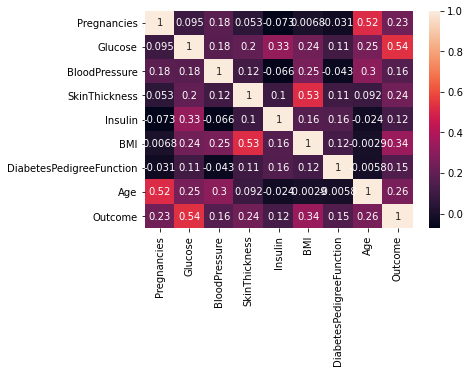

In [34]:
sns.heatmap(df.corr(), annot=True)

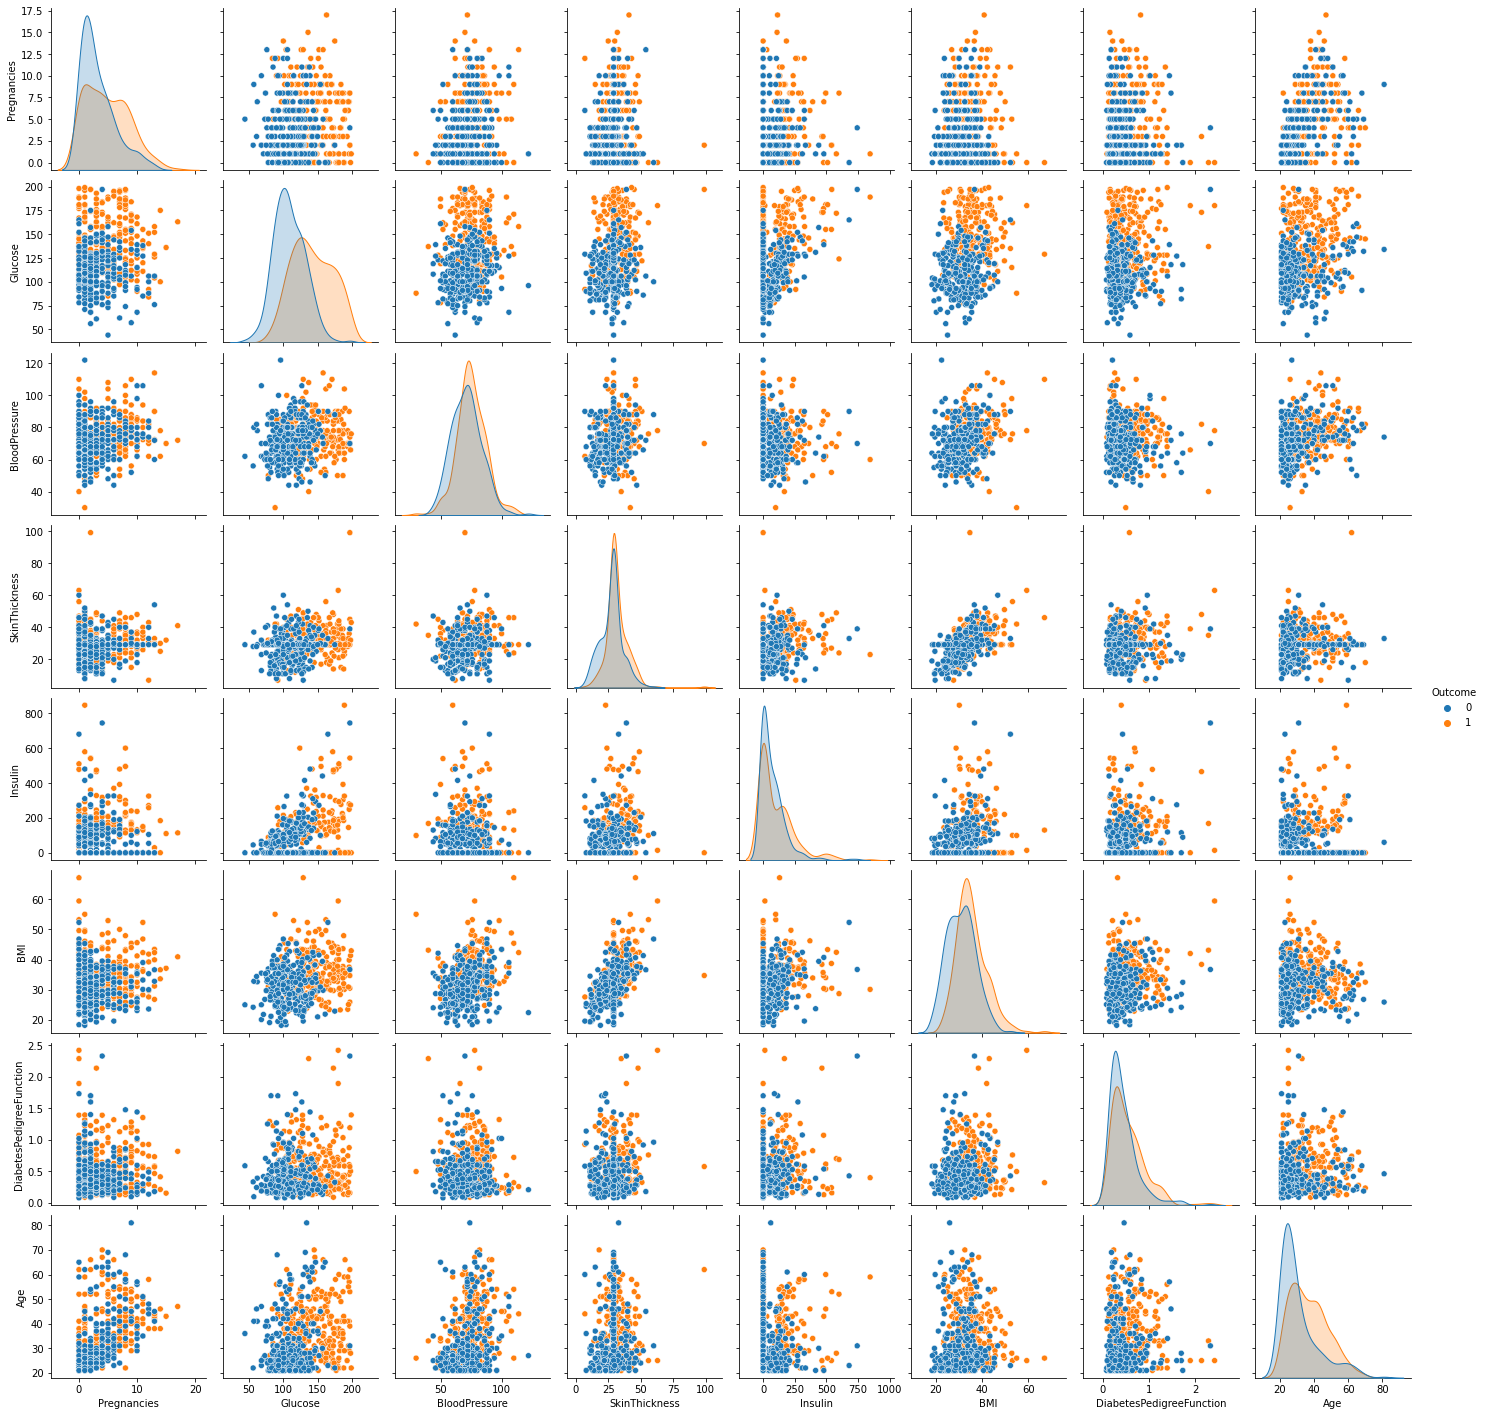

In [35]:
sns.pairplot(data=df, hue='Outcome')

Glucose looks different for diabetics and non-diabetics. Time to try some histograms.

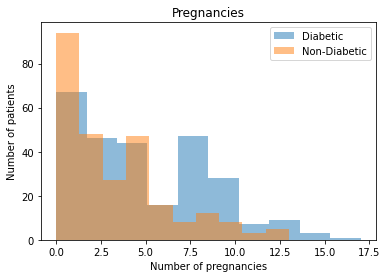

In [36]:
plt.hist(diabetic['Pregnancies'], alpha=0.5, label='Diabetic')
plt.hist(non_diabetic['Pregnancies'], alpha=0.5, label='Non-Diabetic')
plt.xlabel('Number of pregnancies')
plt.ylabel('Number of patients')
plt.title('Pregnancies')
plt.legend()

A very similar pattern for both diabetics and non-diabetics.


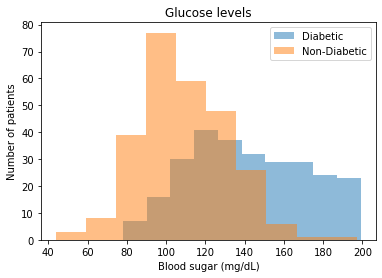

In [37]:
plt.hist(diabetic['Glucose'], alpha=0.5, label='Diabetic')
plt.hist(non_diabetic['Glucose'], alpha=0.5, label='Non-Diabetic')
plt.xlabel('Blood sugar (mg/dL)')
plt.ylabel('Number of patients')
plt.title('Glucose levels')
plt.legend()

Notably higher glucose in diabetic patients.

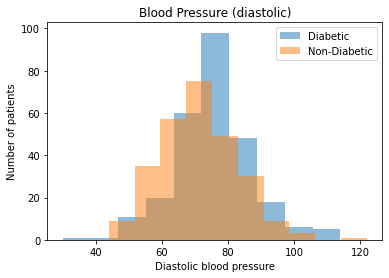

In [38]:
plt.hist(diabetic['BloodPressure'], alpha=0.5, label='Diabetic')
plt.hist(non_diabetic['BloodPressure'], alpha=0.5, label='Non-Diabetic')
plt.xlabel('Diastolic blood pressure')
plt.ylabel('Number of patients')
plt.title('Blood Pressure (diastolic)')
plt.legend()

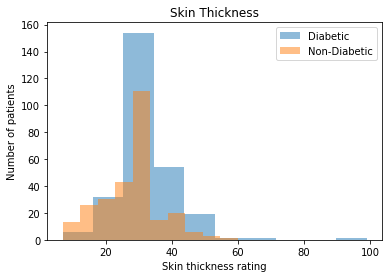

In [39]:
plt.hist(diabetic['SkinThickness'], alpha=0.5, label='Diabetic')
plt.hist(non_diabetic['SkinThickness'], alpha=0.5, label='Non-Diabetic')
plt.xlabel('Skin thickness rating')
plt.ylabel('Number of patients')
plt.title('Skin Thickness')
plt.legend()

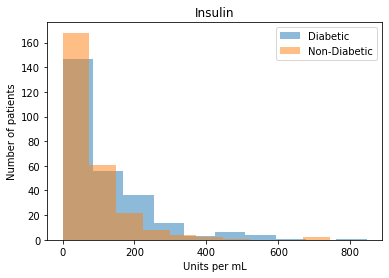

In [40]:
plt.hist(diabetic['Insulin'], alpha=0.5, label='Diabetic')
plt.hist(non_diabetic['Insulin'], alpha=0.5, label='Non-Diabetic')
plt.xlabel('Units per mL')
plt.ylabel('Number of patients')
plt.title('Insulin')
plt.legend()

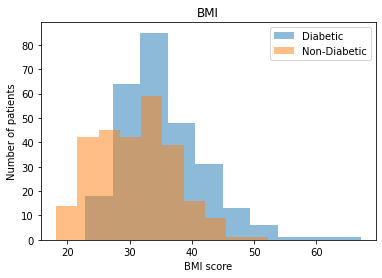

In [41]:
plt.hist(diabetic['BMI'], alpha=0.5, label='Diabetic')
plt.hist(non_diabetic['BMI'], alpha=0.5, label='Non-Diabetic')
plt.xlabel('BMI score')
plt.ylabel('Number of patients')
plt.title('BMI')
plt.legend()

A slightly higher BMI in diabetic patients

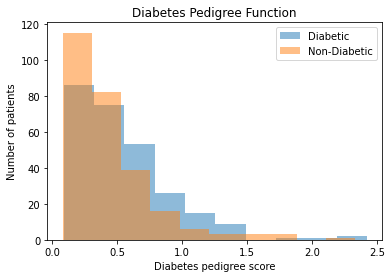

In [42]:
plt.hist(diabetic['DiabetesPedigreeFunction'], alpha=0.5, label='Diabetic')
plt.hist(non_diabetic['DiabetesPedigreeFunction'], alpha=0.5, label='Non-Diabetic')
plt.xlabel('Diabetes pedigree score')
plt.ylabel('Number of patients')
plt.title('Diabetes Pedigree Function')
plt.legend()

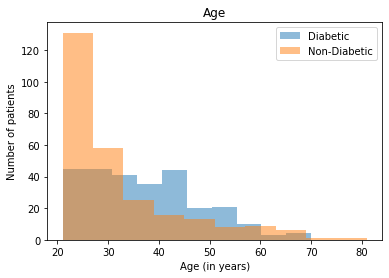

In [43]:
plt.hist(diabetic['Age'], alpha=0.5, label='Diabetic')
plt.hist(non_diabetic['Age'], alpha=0.5, label='Non-Diabetic')
plt.xlabel('Age (in years)')
plt.ylabel('Number of patients')
plt.title('Age')
plt.legend()

BMI and Glucose tend to differ for diabetic patients vs non-diabetic patients. 

These are features to keep an eye on. For now, the study will move on to pre-processing and training

PRE-PROCESSING AND TRAINING

To review, let's check the data types in the data frame.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 51
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               534 non-null    int64  
 1   Glucose                   534 non-null    float64
 2   BloodPressure             534 non-null    float64
 3   SkinThickness             534 non-null    float64
 4   Insulin                   534 non-null    int64  
 5   BMI                       534 non-null    float64
 6   DiabetesPedigreeFunction  534 non-null    float64
 7   Age                       534 non-null    int64  
 8   Outcome                   534 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 41.7 KB


There are no categorical variables beyond Outcome. The data will be processed for Random Forest, Adaboost, and Gradient Boosting. These types of machine learning do not require scaling of variables as they are based on decision trees. However, Adaboost and Gradient Boosting are sensitive to outliers.


<AxesSubplot:xlabel='Pregnancies'>

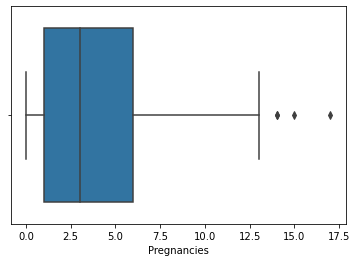

In [49]:
sns.boxplot(x=df["Pregnancies"])

<AxesSubplot:xlabel='Glucose'>

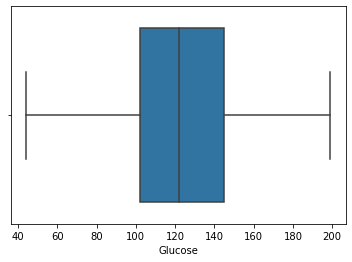

In [50]:
sns.boxplot(x=df["Glucose"])

<AxesSubplot:xlabel='BloodPressure'>

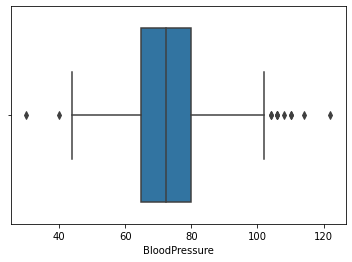

In [51]:
sns.boxplot(x=df["BloodPressure"])

Those two very low blood pressures are suspect. High blood pressure is very possible, but can a human live with diastolic blood pressure under 45?

In [64]:
df[df['BloodPressure'] < 42]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
125,1,88.0,30.0,42.0,99,55.0,0.496,26,1


These points are suspect, but they will be left alone. The rest of the numbers seem believable. Extended field knowledge would be beneficial to eliminating outliers.

<AxesSubplot:xlabel='SkinThickness'>

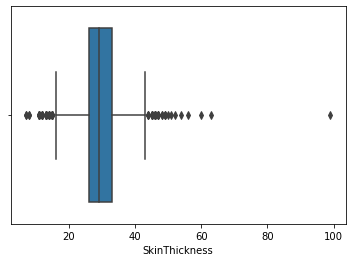

In [52]:
sns.boxplot(x=df["SkinThickness"])

There is an outlier here with very thick skin.


In [57]:
df[df['SkinThickness'] > 90]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197.0,70.0,99.0,0,34.7,0.575,62,1


This outlier is far from the other outliers. It will be deleted.


In [58]:
df = df[df['SkinThickness'] != 99]

<AxesSubplot:xlabel='SkinThickness'>

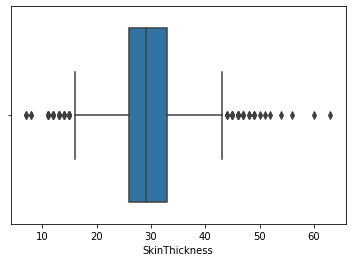

In [59]:
sns.boxplot(x=df["SkinThickness"])

Much better.

<AxesSubplot:xlabel='Insulin'>

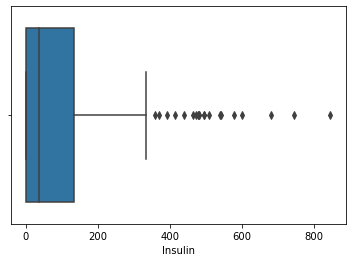

In [53]:
sns.boxplot(x=df["Insulin"])

Lots of high outliers for insulin, BMI, and pedigree make sense given the nature of diabetes.

<AxesSubplot:xlabel='BMI'>

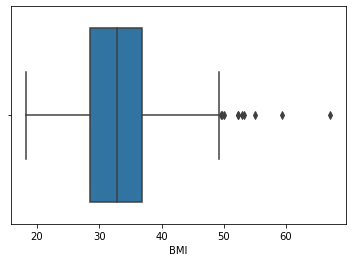

In [54]:
sns.boxplot(x=df["BMI"])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

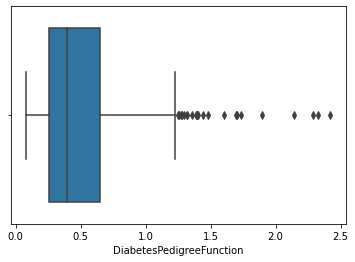

In [55]:
sns.boxplot(x=df["DiabetesPedigreeFunction"])

<AxesSubplot:xlabel='Age'>

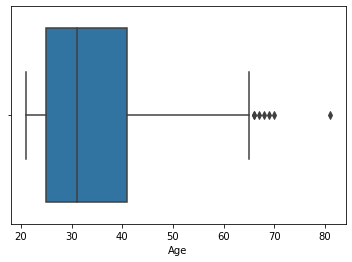

In [56]:
sns.boxplot(x=df["Age"])

It wouldn't hurt to check that 80+ year old patient.

In [60]:
df[df['Age'] > 80]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9,134.0,74.0,33.0,60,25.9,0.46,81,0


Again, their age may skew the results of boosting due to being a very extreme outlier. This result will be deleted.

In [61]:
df = df[df['Age'] != 81]

<AxesSubplot:xlabel='Age'>

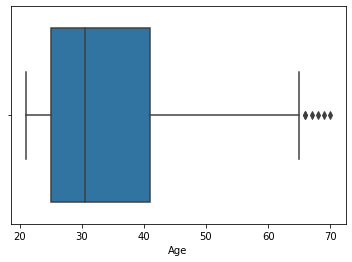

In [62]:
sns.boxplot(x=df["Age"])

In [65]:
df.shape

(534, 9)

With the outliers removed, it's time to split the data into training and testing sets.

In [77]:
# Source used for train-test split: https://www.bitdegree.org/learn/train-test-split#:~:text=train_test_split%20is%20a%20function%20in%20Sklearn%20model%20selection,will%20make%20random%20partitions%20for%20the%20two%20subsets.
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[cols] #all columns except Outcome
y = df.Outcome
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.75, random_state=72)

Next up will be modeling.